Copyright (C)
2016 - 2019 Pinard Liu(liujianping-ok@163.com)

https://www.cnblogs.com/pinard

Permission given to modify the code as long as you keep this declaration at the top

scikit-learn K近邻法类库使用小结 https://www.cnblogs.com/pinard/p/6065607.html

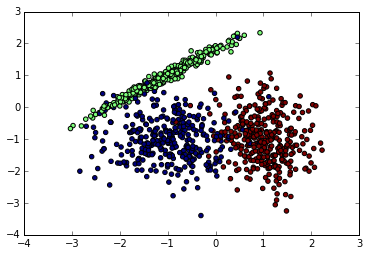

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification
# X为样本特征，Y为样本类别输出， 共1000个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
plt.show()

In [17]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 15 , weights='distance')
clf.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

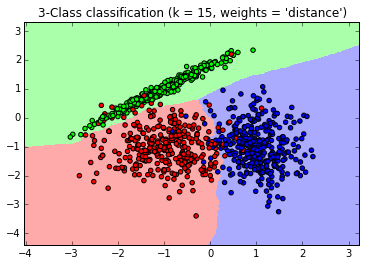

In [19]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#确认训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#生成随机数据来做测试集，然后作预测
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 画出测试集数据
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 也画出所有的训练集数据
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 15, weights = 'distance')" )